In [6]:
#importin library

import numpy as np    # linear algebra
import pandas as pd   # data processing( e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [19]:
# import CSV and convert Frame
df=pd.read_csv('Dhaka Rent - Dhaka Rent.csv')

In [21]:
# 1st five row
df.head()


,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [22]:
# last five roew
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [23]:
# Shape of the data set
df.shape

(60, 2)

In [24]:
# list out all columns
df.columns

Index(['area', 'rent'], dtype='object')

In [25]:
# information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [26]:
# check null value
df.isnull().sum()

area    0
rent    0
dtype: int64

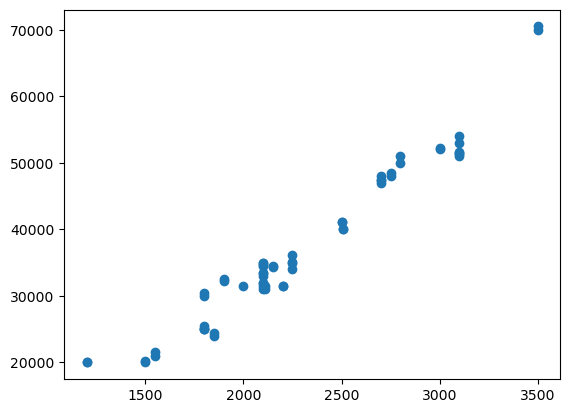

In [27]:
# visualizing the relationship between area & rent
plt.scatter(df['area'],df['rent'])

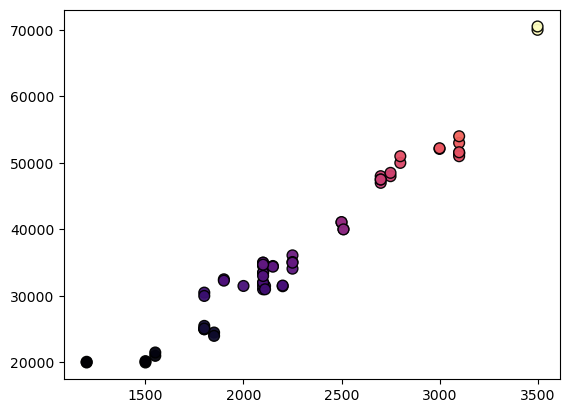

In [28]:
# Scatter plot of Area vs Rent
plt.scatter(df['area'],  #x-axis value
           df['rent'],   #y-axis value
           c=df['rent'], #color by rent
           cmap= 'magma', # color map
           s=60,         #Point size
           alpha=0.95,   #Transparency
           edgecolor='k') #balck edges

Text(0.5, 1.0, 'Area vs Rent In Dhaka City')

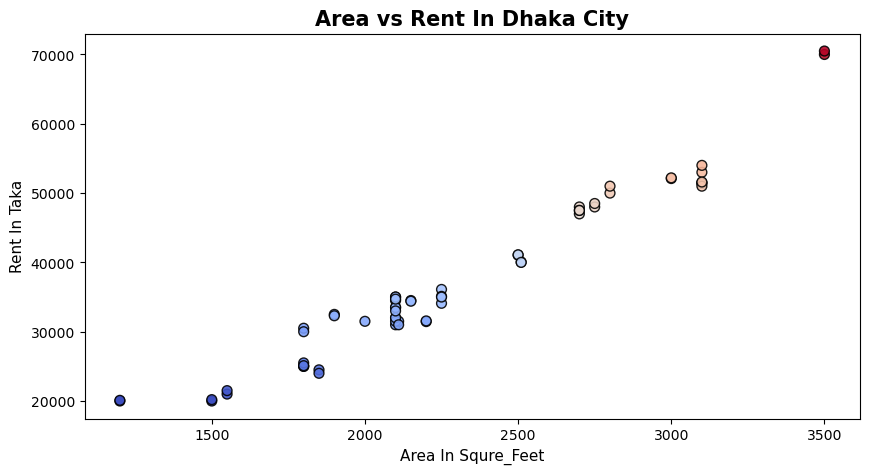

In [31]:
# Scatter plot of Area vs rent
plt.figure(figsize=(10,5))

plt.scatter(df['area'],
           df['rent'],
           c=df['rent'],
           cmap='coolwarm',
           s=50,
           alpha=.89,
           edgecolor='k')
plt.xlabel('Area In Squre_Feet',fontsize=11)
plt.ylabel('Rent In Taka',fontsize=11)
plt.title('Area vs Rent In Dhaka City',fontsize=15, weight='bold')


In [33]:
# check correlation
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [36]:
# LR with Hardcoded Formula
x=df['area']
y=df['rent']
dev_x=x-np.mean(x)
dev_y=y-np.mean(y)

# calculation of slop
m=np.sum(dev_x*dev_y)/np.sum(dev_x**2)
print(m)  

# calculation of intercept
# c=y_mean-m*x_mean
c=np.mean(y) - (m*np.mean(x))
print(c)

21.292661473611954
-11469.7354464311


In [37]:
df.head()


,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [39]:
#y=mx+c
float(m*2100+c)

33244.85364815401

In [40]:
float(m*2250+c)

36438.7528691958

In [43]:
# Linear Regression using SKLEARN
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(df[['area']], y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [44]:
reg.coef_

array([21.29266147])

In [46]:
float(reg.intercept_)

-11469.735446431114

In [48]:
reg.predict([[2250]])

E:\New folder\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36438.7528692])

In [51]:
# predict all data in dataset of Area
reg.predict(df[['area']]).round(2)

array([31115.59, 33244.85, 41761.92, 36438.75, 52408.25, 28986.32,
       20469.26, 27921.69, 46020.45, 33244.85, 34309.49, 33244.85,
       33244.85, 41974.84, 36438.75, 54537.52, 26857.06, 21533.89,
       26857.06, 46020.45, 33457.78, 33244.85, 63054.58, 14081.46,
       48149.72, 54537.52, 47085.08, 26857.06, 35374.12, 54537.52,
       33244.85, 33244.85, 41761.92, 36438.75, 52408.25, 28986.32,
       20469.26, 27921.69, 46020.45, 33244.85, 34309.49, 33244.85,
       33244.85, 41974.84, 36438.75, 54537.52, 26857.06, 21533.89,
       26857.06, 46020.45, 33457.78, 33244.85, 63054.58, 14081.46,
       48149.72, 54537.52, 47085.08, 26857.06, 35374.12, 54537.52])

In [54]:
# now copy the predicted data
df2= df.copy()
df2['predicted'] = reg.predict(df[['area']])
df2.tail().round(2)

,area,rent,predicted
55,3100,54000,54537.52
56,2750,48500,47085.08
57,1800,25100,26857.06
58,2200,31560,35374.12
59,3100,51600,54537.52


In [55]:
reg.score(df[['area']], df[['rent']])

0.950249380357677

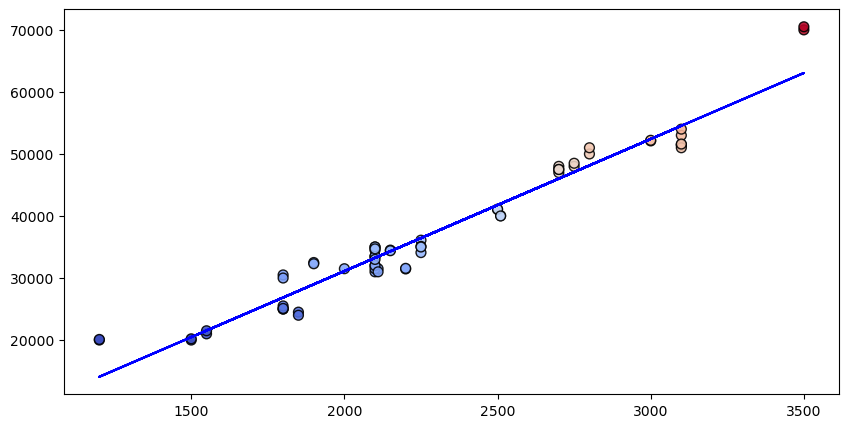

In [61]:
plt.figure(figsize=(10,5))

plt.plot(df[['area']], reg.predict(df[['area']]), color='blue')

plt.scatter(df['area'],
           df['rent'],
           c=df['rent'],
           cmap='coolwarm',
           s=50,
           alpha=.89,
           edgecolor='k')

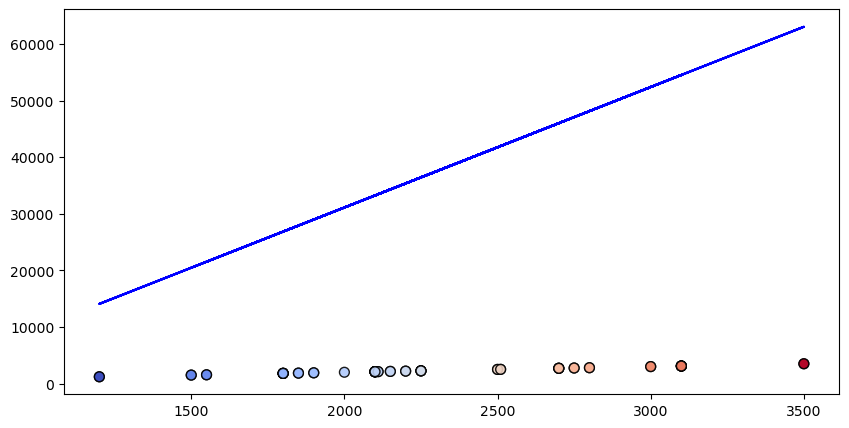

In [62]:
plt.figure(figsize=(10,5))

plt.plot(df[['area']], reg.predict(df[['area']]), color='blue')

plt.scatter(df['area'],
           df['area'],
           c=df['area'],
           cmap='coolwarm',
           s=50,
           alpha=.89,
           edgecolor='k')

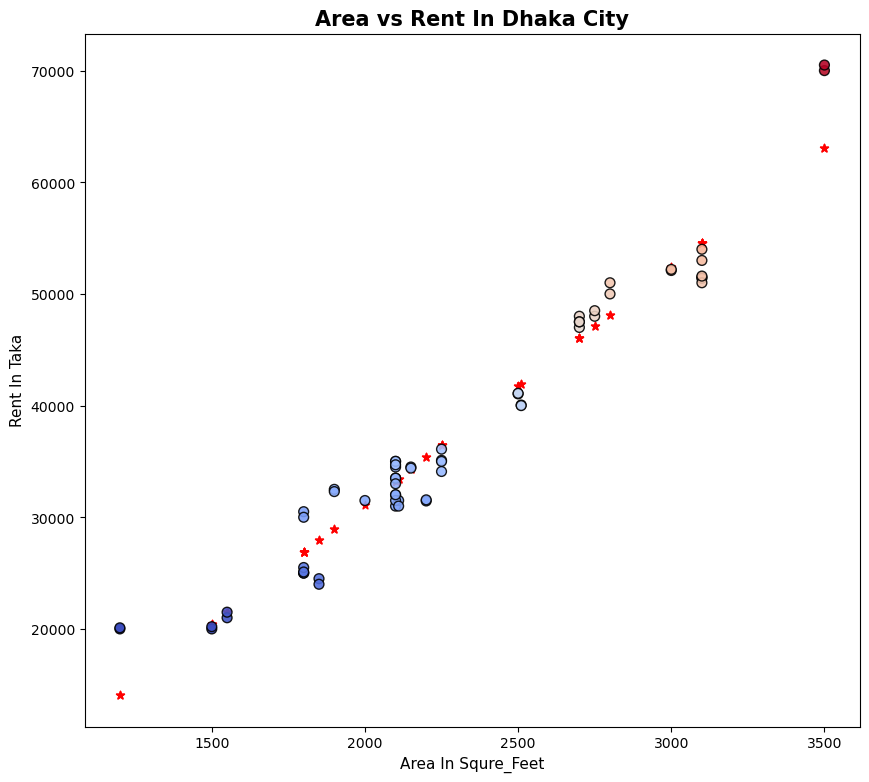

In [85]:
plt.figure(figsize=(10,9))


plt.scatter(df[['area']], reg.predict(df[['area']]), color='red', marker='*')

plt.scatter(df['area'],
           df['rent'],
           c=df['rent'],
           cmap='coolwarm',
           s=50,
           alpha=.89,
           edgecolor='k')


plt.xlabel('Area In Squre_Feet',fontsize=11)
plt.ylabel('Rent In Taka',fontsize=11)
plt.title('Area vs Rent In Dhaka City',fontsize=15, weight='bold')
plt.plot()
plt.show()

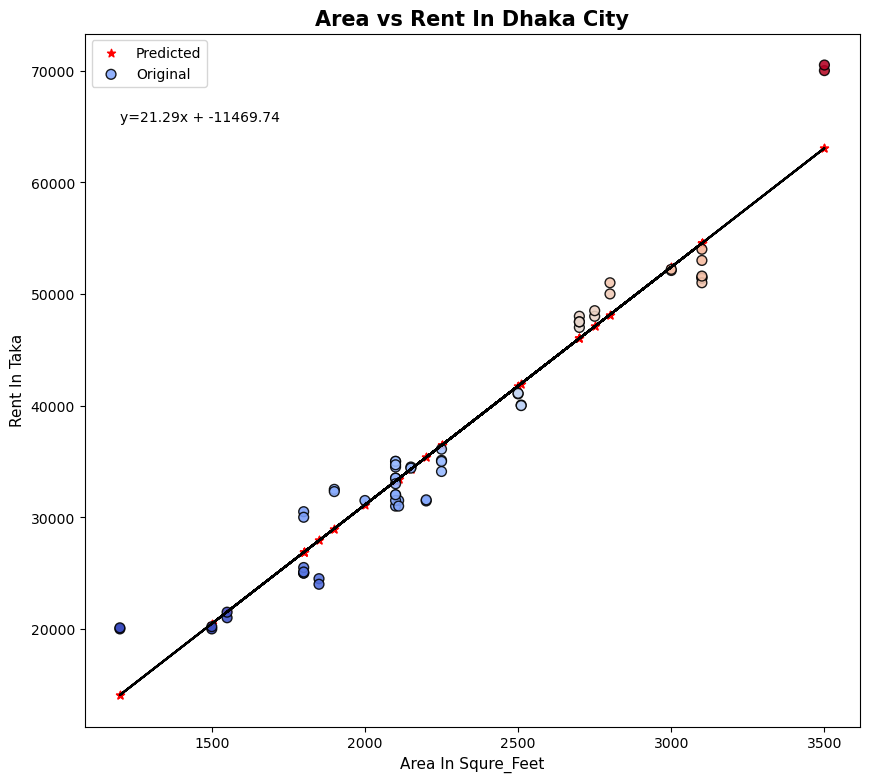

In [86]:
plt.figure(figsize=(10,9))

m = reg.coef_[0]
c = reg.intercept_
equ = f"y={float(m):.2f}x + {float(c):.2f}"

plt.text(min(df['area']), max(df['rent'])-5000, equ)

plt.scatter(df[['area']], reg.predict(df[['area']]), color='red', marker='*',label='Predicted')

plt.scatter(df['area'],
           df['rent'],
           c=df['rent'],
           cmap='coolwarm',
           s=50,
           alpha=.89,
           edgecolor='k',
           label='Original')


plt.xlabel('Area In Squre_Feet',fontsize=11)
plt.ylabel('Rent In Taka',fontsize=11)
plt.title('Area vs Rent In Dhaka City',fontsize=15, weight='bold')
plt.plot(df['area'], df2['predicted'], color='black')

plt.legend()
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(df2[['rent']], df2['predicted'])

6778077.204095561

In [91]:
mean_absolute_error(df2[['rent']], df2['predicted'])

2009.8695093576282